Linear regression program that goes from manual data  to calculation to prediction to visualization using only basic Python without using sklearn.

In [2]:
import matplotlib.pyplot as plt

Independent variable (x) -> Diameter of Pizza
Dependent variable (y) -> Price of Pizza

In [3]:
x=[8,10,12]
y=[10,13,16]

Calculate the means of x and y

In [4]:
mean_x = sum(x) / len(x)
mean_y = sum(y) / len(y)

Calculating the slope(m)

In [5]:
numerator = 0
denominator = 0

In [6]:
for i in range(len(x)):
    numerator += (x[i] - mean_x) * (y[i] - mean_y)
    denominator += (x[i] - mean_x) ** 2

In [7]:
m = numerator / denominator
b = mean_y - (m * mean_x)

In [8]:
print(f"Equation of the line: y = {m:.2f}x + {b:.2f}")

Equation of the line: y = 1.50x + -2.00


Predict price for a new diameter

In [9]:
new_diameter = 20
predicted_price = m * new_diameter + b
print(f"Predicted price for a {new_diameter}-inch pizza: ${predicted_price:.2f}")

Predicted price for a 20-inch pizza: $28.00


plot original data points

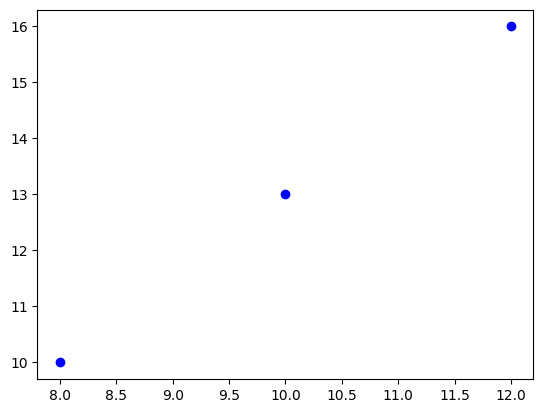

In [10]:
plt.scatter(x, y, color='blue', label='Original Data')

plot regression line

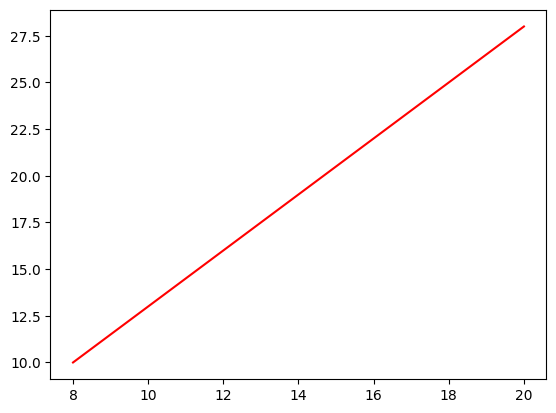

In [11]:
x_line = [min(x), max(x), new_diameter]
y_line = [m * xi + b for xi in x_line]
plt.plot(x_line, y_line, color='red', label='Regression Line')

Plot the predicted point

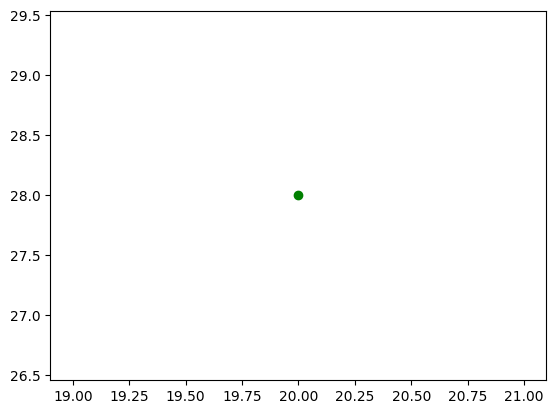

In [12]:
plt.scatter(new_diameter, predicted_price, color='green', label=f'Predicted Price (${predicted_price:.2f})')

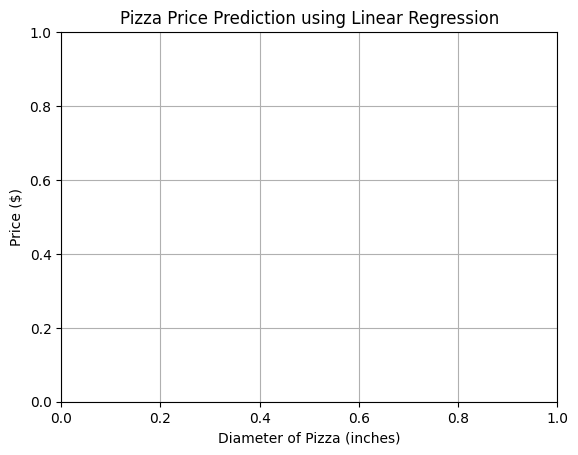

In [13]:
plt.xlabel('Diameter of Pizza (inches)')
plt.ylabel('Price ($)')
plt.title('Pizza Price Prediction using Linear Regression')
plt.grid(True)
plt.show()

Linear regression program that goes with python libraries


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
df = pd.read_csv('pizza.csv')

In [20]:
print(df.head())

   Diameter  Price
0         6      7
1         8     10
2        10     15
3        12     20
4        14     22


In [19]:
print("DatasetOverview:\n")
print(df.describe())

DatasetOverview:

        Diameter      Price
count   8.000000   8.000000
mean   13.000000  19.500000
std     4.898979   8.194075
min     6.000000   7.000000
25%     9.500000  13.750000
50%    13.000000  21.000000
75%    16.500000  25.500000
max    20.000000  30.000000


In [21]:
X=df[['Diameter']]
y=df['Price']